--------------------------------------------------
Initial parameters: 1, 3, 65
Running iteration 1 with parameters: 1, 3, 65
In processing folder: test_case_10_folder
In processing folder: test_case_11_folder
In processing folder: test_case_12_folder
In processing folder: test_case_13_folder
In processing folder: test_case_14_folder
In processing folder: test_case_15_folder
In processing folder: test_case_1_folder
In processing folder: test_case_2_folder
In processing folder: test_case_3_folder
In processing folder: test_case_4_folder
In processing folder: test_case_5_folder
In processing folder: test_case_6_folder
In processing folder: test_case_7_folder
In processing folder: test_case_8_folder
In processing folder: test_case_9_folder
In processing folder: test_case_10_folder
In processing folder: test_case_11_folder
In processing folder: test_case_12_folder
In processing folder: test_case_13_folder
In processing folder: test_case_14_folder
In processing folder: test_case_15_folder
I

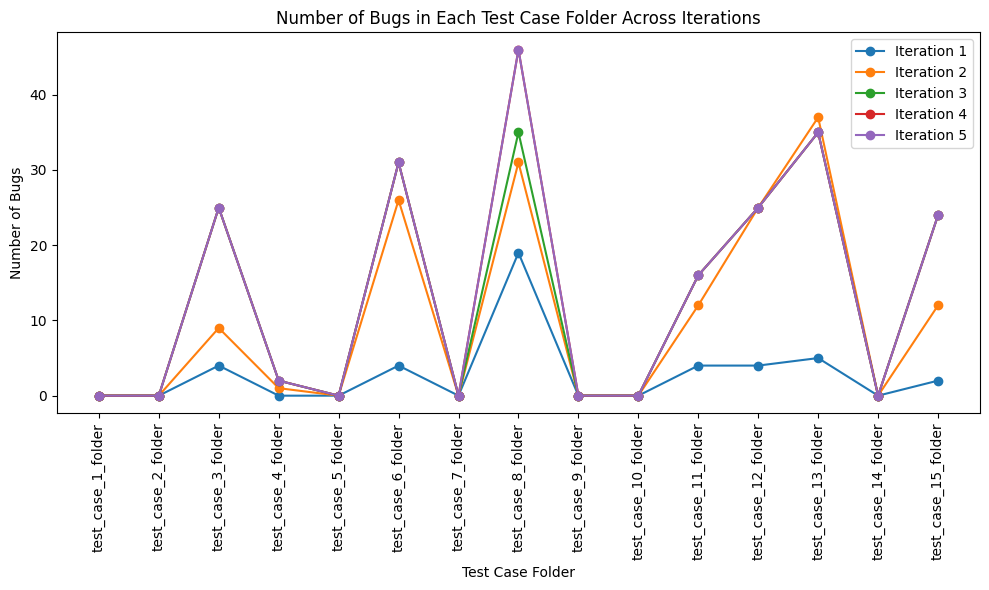

In [19]:
#    This script is used to generate 3 random parameters 
#    as command line arguments for the operate_script.sh script.
#    It will then run the script with these parameters to 
#    generate the output files in each test case folder.
#    After that, it will read the output files and
#    extract the number of bugs specified in the output files.
#    Then it will plot the number of bugs in each test case folder.

# import necessary libraries
import os
import random
import subprocess
import matplotlib.pyplot as plt

# Set the current working directory
current_dir = "/home/shanghuang/Documents/Code related/SoftwareBugDetectionUsingCallGraphReferences/recreate"
# Change the current working directory to the script's directory
os.chdir(current_dir)

# Script running command
script_command = "./operate_script.sh"

# Folder path to the test cases
test_cases_dir = current_dir + "/test_cases"

# Folder path to the results
# Create the results directory if it does not exist
results_dir = current_dir + "/results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Generate 3 random parameters
def generate_random_parameters():
    # Generate 3 random parameters
    param1 = random.randint(1, 10)
    param2 = random.randint(1, 30)
    param3 = random.randint(0, 100)
    return param1, param2, param3

# Run the script with the parameters
def run_script(param1, param2, param3):

    # Run the script with the parameters
    subprocess.run([
        "bash",
        str(script_command), 
        str(param1), 
        str(param2), 
        str(param3)
    ])

# Read the generated_callgraph.out output files 
# in each test case folder
# and extract the number of bugs
def read_output_files():
    # List to store the number of bugs in each test case folder
    bugs_count = []
    # Loop through each test case folder
    for test_case in os.listdir(test_cases_dir):
        # Path to the generated_callgraph.out file
        output_file_path = os.path.join(test_cases_dir, test_case, "generated_callgraph.out")
        # Check if the file exists
        if os.path.exists(output_file_path):
            # Read the file and extract the number of bugs 
            # Bug is sepecified by the line "bug may appear"
            with open(output_file_path, "r") as file:
                lines = file.readlines()
                # Count the number of lines that contain "bug may appear"
                count = sum(1 for line in lines if "bug" in line)
                bugs_count.append(count)
        else:
            # If the file does not exist, append 0 to the list
            bugs_count.append(0)
    return bugs_count

# Plot the number of bugs in each test case folder
def plot_bugs_count(bugs_count):
    # Plot the number of bugs in each test case folder
    plt.bar(range(len(bugs_count)), bugs_count)
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.tight_layout()
    plt.show()

# Plot the number of bugs in each test case folder in each iteration as a line chart
# Each line represents a iteration of each parameter set
def plot_bugs_count_line_chart(bugs_count):
    # Plot the number of bugs in each test case folder
    plt.plot(range(len(bugs_count)), bugs_count, marker='o')
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.tight_layout()
    plt.show()

# Function to package the workflow for random parameters method
def package_workflow():
    # Generate random parameters
    param1, param2, param3 = generate_random_parameters()
    print(f"Generated parameters: {param1}, {param2}, {param3}")
    
    # Run the script with the parameters
    run_script(param1, param2, param3)
    
    # Read the output files and extract the number of bugs
    bugs_count = read_output_files()
    
    # Plot the number of bugs in each test case folder
    plot_bugs_count(bugs_count)

# Function to package the workflow for selected parameters method
def package_workflow_selected():
    # Define the selected parameters
    param1 = 1  # This parameter is selected to increment the IPC_LEVEL
    param2 = 3
    param3 = 65
    print(f"Initial parameters: {param1}, {param2}, {param3}")

    # Dictionary to store bugs count for each iteration
    iterations_bugs_count = {}

    # Loop through 5 iterations
    for iteration in range(1, 6):
        print(f"Running iteration {iteration} with parameters: {param1}, {param2}, {param3}")
        
        # Run the script with the current parameters
        run_script(param1, param2, param3)
        
        # Read the output files and extract the number of bugs
        bugs_count = read_output_files()
        
        # Store the bugs count for this iteration
        iterations_bugs_count[f"Iteration {iteration}"] = bugs_count
        
        # Increment param1 for the next iteration
        param1 += 1

    # Plot the results as a line chart
    plt.figure(figsize=(10, 6))
    for iteration, bugs_count in iterations_bugs_count.items():
        plt.plot(range(len(bugs_count)), bugs_count, marker='o', label=iteration)

    # Configure the chart
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder Across Iterations")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.legend()
    plt.tight_layout()

    # Set y-axis as 0, 5, 10, 15, 20
    

    # # Save the chart to the results directory
    # chart_path = os.path.join(results_dir, "bugs_count_iterations_chart.png")
    # plt.savefig(chart_path)
    # print(f"Chart saved to: {chart_path}")

    # Show the chart
    plt.show()

# Main function
def main():
    # Package the workflow for random parameters method
    # package_workflow()

    print("--------------------------------------------------")
    
    # Package the workflow for selected parameters method
    package_workflow_selected()

if __name__ == "__main__":
    main()